<a href="https://colab.research.google.com/github/V1S10US/My-projects/blob/main/Data_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sns.set(rc={'figure.figsize' : (9, 6)})

In [ ]:
submissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning Introduction/submissions_data_train.csv')
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [ ]:
event_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning Introduction/event_data_train.csv')
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


# EDA

In [ ]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [ ]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [ ]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
event_data.date[1]

Timestamp('2015-06-15 04:00:48')

In [ ]:
event_data['day'] = event_data.date.dt.date
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [ ]:
event_data.day.nunique()

1070

Количество действий всех пользователей по дням

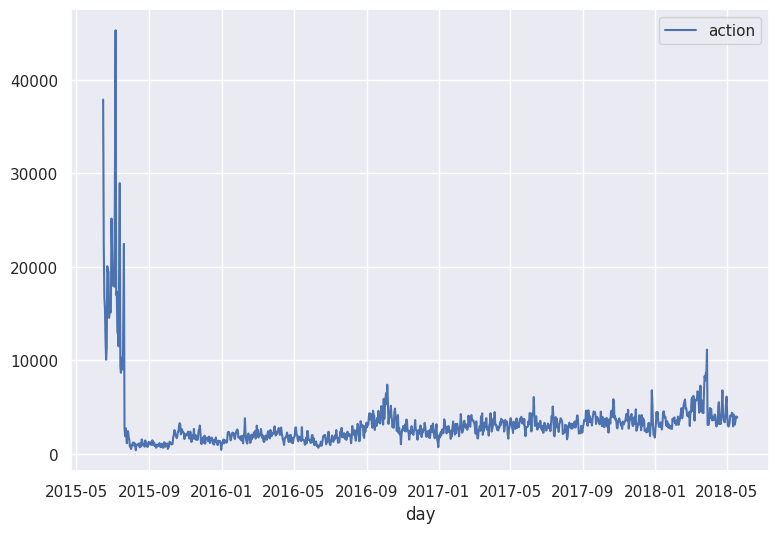

In [ ]:
actions_by_days = event_data.groupby(event_data.day, as_index=True).agg({'action' : 'count'})
actions_by_days.head()
sns.lineplot(actions_by_days, );

Количество уникальных пользователей по дням

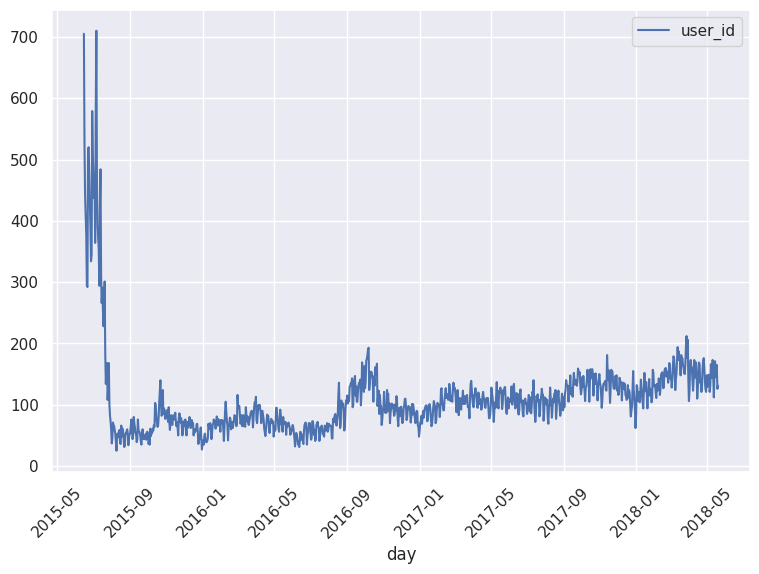

In [ ]:
uniques_by_day = event_data.groupby(event_data.day).agg({'user_id' : 'nunique'})
sns.lineplot(uniques_by_day).tick_params(axis='x', rotation=45);

Суммарное количество пройденных шагов

In [ ]:
users_actions_pt = event_data.pivot_table(index='user_id', columns='action',
                       values='step_id', aggfunc='count',
                       fill_value=0).reset_index()
users_actions_pt.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


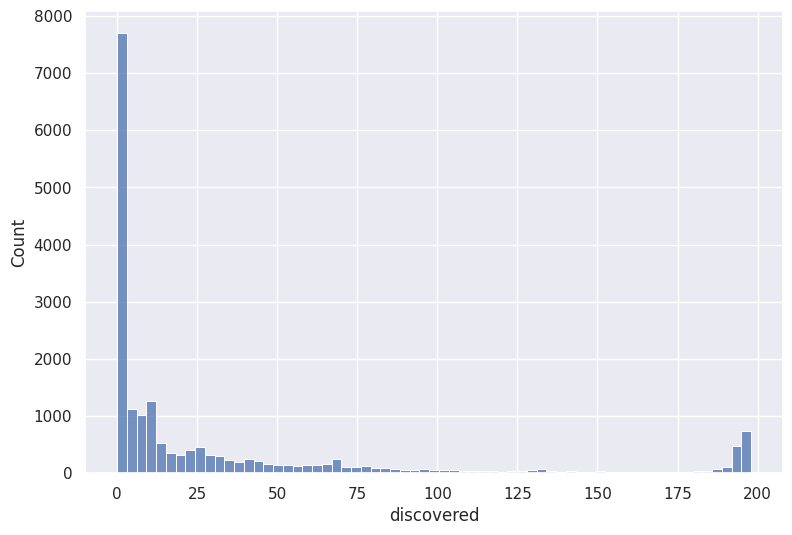

In [ ]:
sns.histplot(users_actions_pt.discovered);

In [ ]:
submissions['date'] = pd.to_datetime(submissions.timestamp, unit='s')
submissions['day'] = submissions.date.dt.date
submissions

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [ ]:
users_subs_pt = submissions.pivot_table(index='user_id', columns='submission_status',
                       values='step_id', aggfunc='count',
                       fill_value=0).rename_axis('', axis=1)
users_subs_pt.head()

,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1


<Axes: ylabel='Count'>

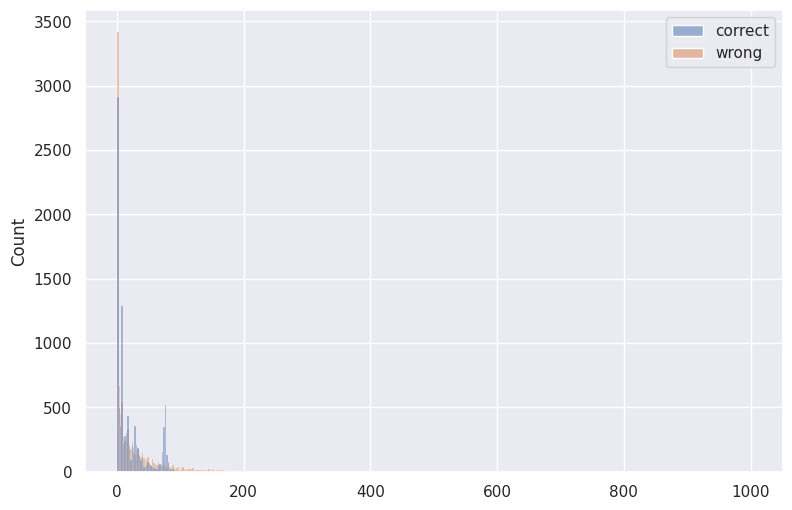

In [ ]:
sns.histplot(users_subs_pt)

Пользователи с экстремальным количеством сабмитов:

In [ ]:
max_correct_id = users_subs_pt[users_subs_pt.correct == users_subs_pt.correct.max()]
min_correct_id = users_subs_pt[users_subs_pt.correct == users_subs_pt.correct.min()]
max_wrong_id = users_subs_pt[users_subs_pt.wrong == users_subs_pt.wrong.max()]
min_wrong_id = users_subs_pt[users_subs_pt.wrong == users_subs_pt.wrong.min()]
max_wrong_id

,correct,wrong
user_id,,
12265,50,1001


In [ ]:
users_actions_pt.sort_values('passed', ascending=False)

action,user_id,discovered,passed,started_attempt,viewed
4089,5653,198,198,93,261
18822,26225,198,198,109,487
854,1139,198,198,77,244
1256,1715,198,198,111,389
10688,14841,198,198,109,520
...,...,...,...,...,...
5535,7662,1,0,1,1
11445,15899,1,0,1,1
16817,23420,1,0,1,1
1747,2385,1,0,1,1


In [ ]:
users_subs_pt.sort_values('correct', ascending=False)

,correct,wrong
user_id,,
1046,421,513
5552,186,93
17135,168,177
6183,142,65
8461,135,42
...,...,...
1321,0,2
26349,0,1
9422,0,1


Промежутки времени между сабмитами каждого пользователя

In [ ]:
gap_data = event_data[['user_id', 'day', 'timestamp']] \
  .drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list) \
  .apply(np.diff).values
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) / (24 * 60*60) # by day
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

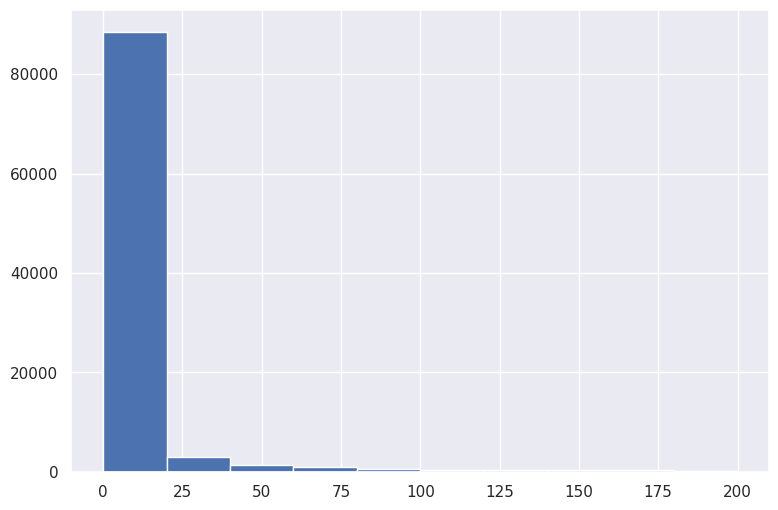

In [ ]:
gap_data[gap_data < 200].hist()

In [ ]:
gap_data.quantile(0.95)

59.760440972222156

Поиск пользователей, наиболее быстро прошедших курс

In [ ]:
certified_users = users_actions_pt[(users_actions_pt.passed == 198)].user_id
certified_users.values

array([   22,    30,    39,    80,   149,   214,   275,   296,   528,
         560,   676,   702,   713,   752,   822,   827,   902,   911,
         927,   956,  1058,  1074,  1076,  1107,  1139,  1151,  1173,
        1188,  1215,  1218,  1468,  1604,  1614,  1702,  1715,  1742,
        1846,  1886,  1913,  2054,  2056,  2078,  2098,  2248,  2355,
        2367,  2393,  2444,  2480,  2496,  2505,  2547,  2566,  2567,
        2700,  2801,  2818,  2832,  2836,  3087,  3148,  3204,  3285,
        3330,  3433,  3516,  3600,  3607,  3643,  3721,  3784,  3834,
        3931,  3990,  4090,  4163,  4172,  4189,  4239,  4320,  4465,
        4546,  4578,  4585,  4610,  4774,  4795,  4824,  4867,  4903,
        4965,  5062,  5247,  5373,  5552,  5560,  5563,  5573,  5596,
        5653,  5801,  5830,  5861,  5929,  5950,  5952,  6020,  6074,
        6378,  6431,  6446,  6447,  6571,  6626,  6742,  6762,  6864,
        6881,  7020,  7081,  7152,  7180,  7294,  7295,  7608,  7682,
        7769,  7858,

In [ ]:
certified_data = event_data[event_data.user_id.isin(certified_users.values)]
certified_data.head()

,step_id,timestamp,action,user_id,date,day
505,32815,1434344946,discovered,11670,2015-06-15 05:09:06,2015-06-15
506,32815,1434344946,passed,11670,2015-06-15 05:09:06,2015-06-15
507,32815,1434344946,viewed,11670,2015-06-15 05:09:06,2015-06-15
508,32811,1434344952,discovered,11670,2015-06-15 05:09:12,2015-06-15
509,32811,1434344952,viewed,11670,2015-06-15 05:09:12,2015-06-15


In [ ]:
certified_times = certified_data[['user_id', 'day', 'timestamp']] \
  .drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list) \
  .apply(np.diff).values
certified_times = pd.Series(np.concatenate(certified_times, axis=0)) / (60)
certified_times.sort_values().head(10)

8829    13.233333
551     17.716667
1171    21.800000
2881    26.700000
8838    28.983333
7324    30.283333
332     31.850000
5879    43.750000
7025    46.433333
1739    48.333333
dtype: float64

Поиск id Анатолия Карпова

In [ ]:
submissions[submissions['submission_status'] == 'correct'] \
  .groupby('user_id') \
  .agg({'submission_status': 'count'}) \
  .rename(columns= {'submission_status' : 'solved_tasks'}).sort_values('solved_tasks', ascending=False)

,solved_tasks
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1


# Model